3강의 주안점은 비용함수를 최소화 시키는 것이다. <br>
머신러닝의 핵심중 하나

전 강의까지 배운 수식은 아래 두개다.
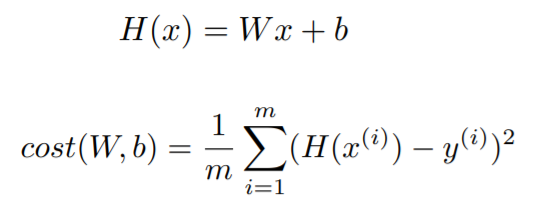
상수는 빼도 상관 없지
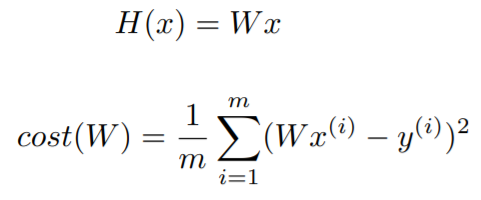

여기서 cost(W)의 수식을 풀어보면 아래 같은 수식이 나옴(다음엔 latex 수식 작성법을 배워서...)
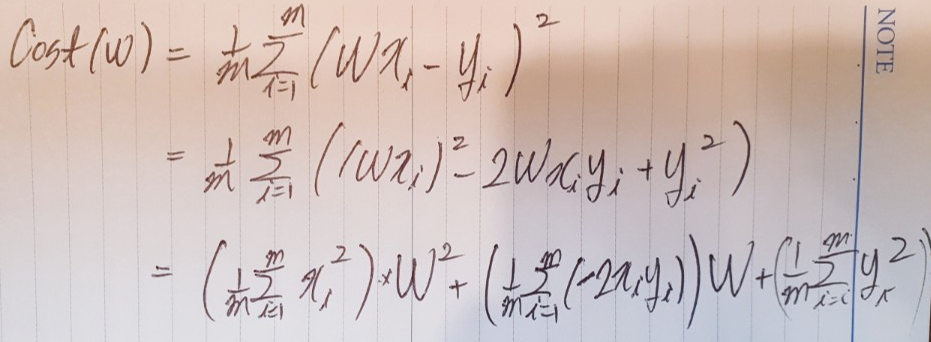
여기서 xi, yi들은 모두 고정된 데이터셋이므로 괄호안 시그마는 고정되어 있음.<br>
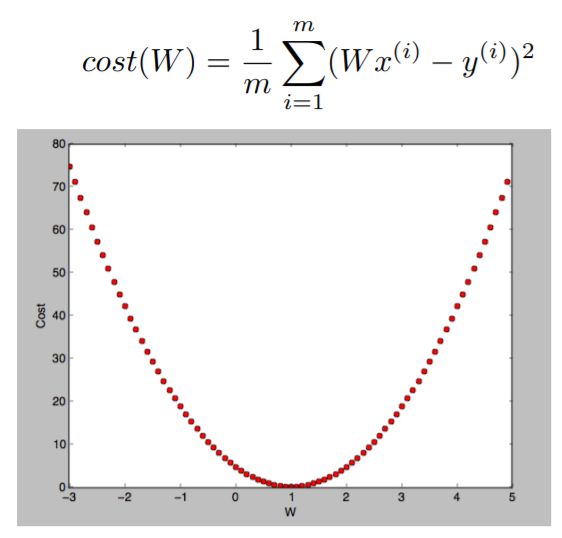
즉, W에 대한 2차 함수임. 

여기서 최솟값 구하는건 고1땐가 고2땐가 암튼 미분하면서 배웠지. 여기서도 별거 없음. 미분하면됨. 

우리의 목적은 cost(W)를 최소화하는 W를 찾는거임.<br>
그리고 위와 같은 2차 함수에서 cost(W)의 최솟값은 cost(W)의 미분값이 0일때인것을 알고 있음.

그리고 W'에 대한 미분값이 0보다 크면 W'값을 줄여 왼쪽으로 이동해야되고<br>
W'에 대한 미분값이 0보다 작으면 W'값을 늘려 오른쪽으로 이동해야됨. <br>

그걸 수식으로 나타내면
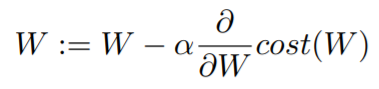
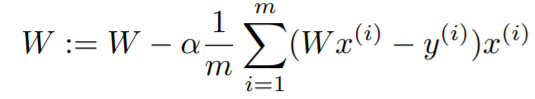
이렇게 됨. 이게 전 강의에서 말했던 변수를 업데이트 하는 것.

여기서 a는 learning rate라고 해서 변화의 폭이 너무 크면 경우에 따라 수렴을 못할 수 있음. - 이후 강의에서 나오지만 발산할 수도 있음


추가적인 개념으로 Convex function에 대해 알아보자.
고등학생때 '아래로 볼록', '위로 오목'이라는 개념으로 배웠던 건데 영어로 하면 그냥 둘을 합쳐 'Convex'라고 부름. 
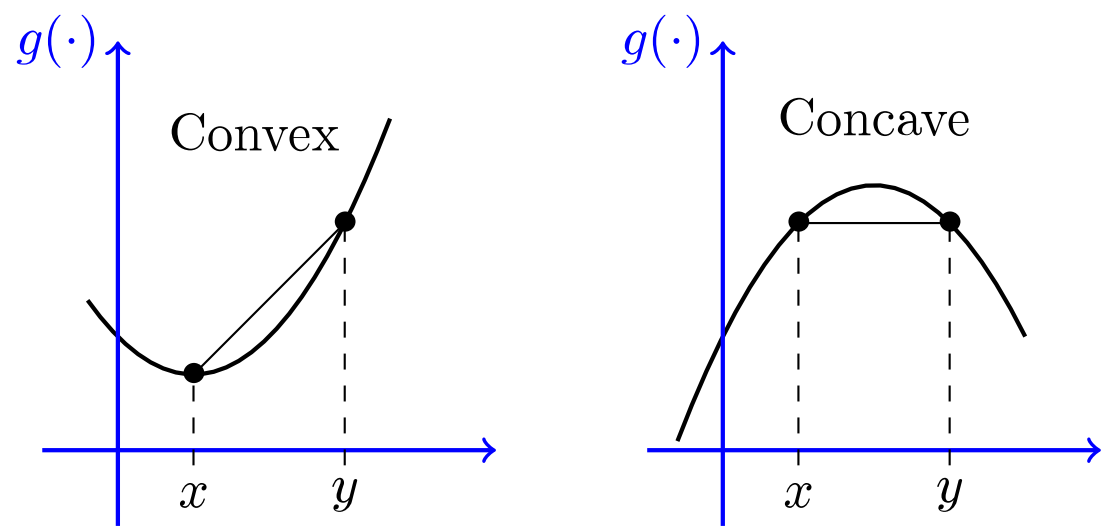
비용함수로 쓰려면 (기초단계에선) convex하던지 concave해야됨. 물론, concave할때는 비용함수를 최대로 올려야 하는 경우에 해당하겠는데, 일반적으론 비용함수는 최소로 낮추는 값을 쓰긴 하지.

convex하지 않으면 
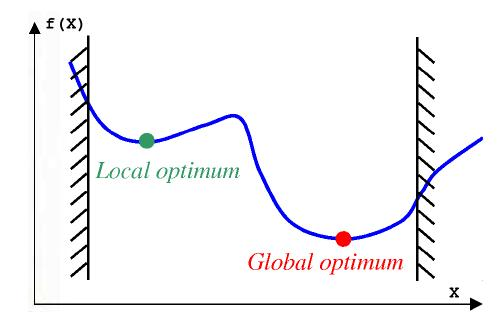
위와 같이 전체의 최적 값을 못 찾고 local한 최적값을 찾을 수 있음.

물론, 김건희 교수님 강의에서 들었듯이 cost함수로 convex하지 않은 함수를 쓰고 local optimum에서 빠져 나오도록 random하게 흔들어주는 기술도 있긴 하지만 이 강의는 완전 튜토리얼이니 그건 잠시 스킵.

끝으로 
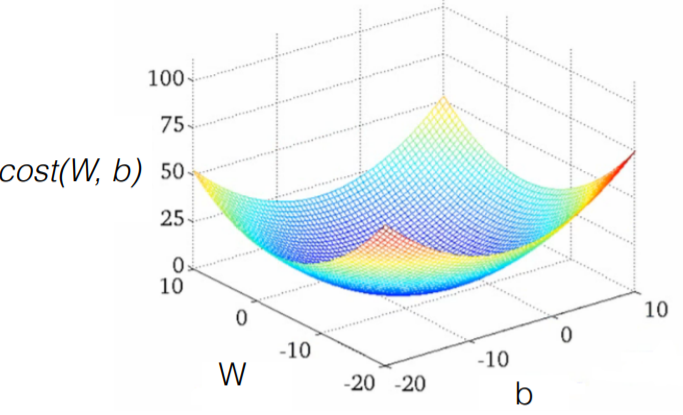
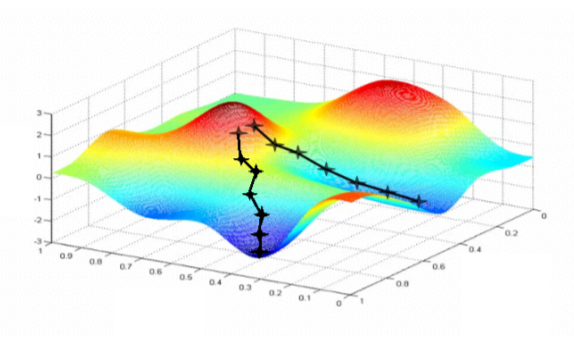
이렇게 차원이 높아져도 당연히 convex한 것들이 있겠지. 4차원 이상으로 보고 싶다

In [ ]:
# lab03

# 여기선 전 강의의 코드를 가져와서 이번 강의에서 배운 것을 적용해본다.
# 지난번 코드에선 비용함수 최적화를 텐서플로 라이브러리를 사용해서 했음.
# 여기선 라이브러리를 좀 풀어서 써보는 걸로 함.

x_data = [1, 2, 3]
y_data = [2, 4 ,6]

import tensorflow.compat.v1 as tf

# 학습 데이터 셋 구조만 만들기
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#################### Graph 설계 ##################

# 변수 생성
W = tf.Variable(tf.random_normal([1]), name='weight')

# 가설 - 여기선 Linear regression / b는 생략함.
hypothesis = X*W

# 비용 함수 - 왜 3강에선 reduce_sum 으로 썼는지는 의문.. 아래에서 reduce_mean써서 그런가
# cost = tf.reduce_mean(tf.square(hypothesis - Y))
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# 비용 함수 최소화 - 전 강의의 라이브러리를 좀 풀어서 작성
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)
learning_rate = 0.01
gradient = tf.reduce_mean((W*X - Y)*X)  # 기울기 - 여길 cost를 미분하는 식을 쓸 줄 알았는데 여기 코드는 살짝의문
descent = W - learning_rate * gradient  # 기존 W를 update한 값
update = W.assign(descent)              # update를 실행하면 W를 descent로 다시 할당 함. 이렇게 해야 tensorflow가 해줌

#################### Graph 실행 및 변수 update ##################
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 변수 업데이트
for step in range(21):
    # 전 강의에선 train을 실행시켰는데 여기선 update를 실행시킴
    # cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict={X:[1,2,3], Y:[1,2,3]})
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
    # if step%20==0:
        # print(step, cost_val, W_val, b_val)

In [ ]:
# 추가로 gradient를 조작할 수 있는 방법도 알려줌. 혜자 강의네.

import tensorflow.compat.v1 as tf

X = [1,2,3]
Y = [2,4,6]

# 초기 W 설정
W = tf.Variable(5.)

# 가설
hypothesiss = X*W

# 수동 gradient
gradient = tf.reduce_mean((W*X - Y)*X)*2

# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# get gradients
gvs = optimizer.compute_gradients(cost, [W])
# apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

fro step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)
    

In [5]:
# 3강은 cost 함수를 minimize하는 gradient descent 알고리즘을 배웠음
# 요약하자면 W = W - learning_rate*cost함수미분값

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [6]:
X = [1,2,3]
Y = [1,2,3]

# 변수 생성
W = tf.placeholder(tf.float32)

# 가설
hypothesis = X*W # 행렬곱
# 비용함수
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# minimize - 수동 조절
# learning_rate = 0.1
# gradient = tf.reduce_mean((W*X - Y)*X)
# descent = W - learning_rate*gradient
# update = W.assign(descent)

# minimize - 자동 조절 : 미분 알아서 해줌
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# 세션 생성
sess = tf.Session()

# 실행 전 변수 초기화
sess.run(tf.global_variables_initializer())

W_val = []     # 그래프 그리기위해 변하는 값들 배열에 넣어놓음
cost_val = []  # 그래프 그리기위해 변하는 값들 배열에 넣어놓음

# 실행
for i in range(-30, 50):
    feed_W = i*0.1 # W를 -3.0 ~ 5.0 사이 움직이겠다. 
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

AttributeError: 'Tensor' object has no attribute 'assign'

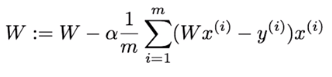

In [ ]:
# 이번 강의의 핵심은 위의 값. cost함수를 W에 대해 미분한 값으로 피드백하며 W를 조정해 나감.



In [7]:
# 나중에 gradient를 직접 조작하고 싶어지면 아래와 같이 조작 가능

# Get gradients
gvs = optimizer.compute_gradients(cost)

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients - 이부분에서 gvs를 맘대로 조작
# apply_gradients = optimizer.apply_gradients(gvs)
apply_gradients = optimizer.apply_gradients(gvs*0.1)
apply_gradients = optimizer.apply_gradients(gvs*0.4)

NameError: name 'optimizer' is not defined